In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Imputer, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from fancyimpute import KNN, IterativeImputer
import re
import os

%matplotlib inline

Using TensorFlow backend.


In [2]:
os.getcwd()

'C:\\Users\\Jay\\Documents\\GitHub\\classes\\projects1234\\project_2\\code'

In [3]:
ames_train_raw = pd.read_csv('../datasets/train.csv')
ames_test_raw = pd.read_csv('../datasets/test.csv')

In [4]:
[x for x in ames_train_raw.columns.to_list() if not x in ames_test_raw.columns.to_list()]

['SalePrice']

In [5]:
ames_combined = pd.concat([ames_train_raw.drop(['SalePrice'],axis=1),ames_test_raw],axis=0,ignore_index=True)

In [6]:
ames_combined.shape

(2930, 80)

In [7]:
ames_combined.isnull().sum()[ames_combined.isnull().sum()>0]

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [8]:
ames_combined.dtypes.value_counts()

object     42
int64      27
float64    11
dtype: int64

In [9]:
ames_combined.dtypes[ames_combined.dtypes=='object']

MS Zoning         object
Street            object
Alley             object
Lot Shape         object
Land Contour      object
Utilities         object
Lot Config        object
Land Slope        object
Neighborhood      object
Condition 1       object
Condition 2       object
Bldg Type         object
House Style       object
Roof Style        object
Roof Matl         object
Exterior 1st      object
Exterior 2nd      object
Mas Vnr Type      object
Exter Qual        object
Exter Cond        object
Foundation        object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Heating           object
Heating QC        object
Central Air       object
Electrical        object
Kitchen Qual      object
Functional        object
Fireplace Qu      object
Garage Type       object
Garage Finish     object
Garage Qual       object
Garage Cond       object
Paved Drive       object
Pool QC           object
Fence             object


In [10]:
ordinals = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual'
           ,'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFinType 2','HeatingQC','Electrical','KitchenQual','Functional',
           'FireplaceQu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence']

In [11]:
ames_combined.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [12]:
[x for x in ordinals if not x in ames_combined.columns] 
#so we see feature names that are discrepancies against the given data dictionary

['BsmtFinType 2', 'HeatingQC', 'KitchenQual', 'FireplaceQu']

In [13]:
ordinals = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual'
           ,'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual','Functional',
           'Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence']

In [14]:
[x for x in ordinals if not x in ames_combined.columns]

[]

In [15]:
[x for x in ordinals if not x in ames_combined.dtypes[ames_combined.dtypes=='object'].index]
#so we know these 2 aren't wrongly labeled

['Overall Qual', 'Overall Cond']

In [16]:
ordinal_dict = {col:ames_combined[col].unique().tolist() for col in ordinals}
ordinal_dict

{'Lot Shape': ['IR1', 'Reg', 'IR2', 'IR3'],
 'Utilities': ['AllPub', 'NoSeWa', 'NoSewr'],
 'Land Slope': ['Gtl', 'Sev', 'Mod'],
 'Overall Qual': [6, 7, 5, 8, 10, 4, 9, 3, 2, 1],
 'Overall Cond': [8, 5, 7, 6, 3, 9, 2, 4, 1],
 'Exter Qual': ['Gd', 'TA', 'Ex', 'Fa'],
 'Exter Cond': ['TA', 'Gd', 'Fa', 'Ex', 'Po'],
 'Bsmt Qual': ['TA', 'Gd', 'Fa', nan, 'Ex', 'Po'],
 'Bsmt Cond': ['TA', 'Gd', nan, 'Fa', 'Po', 'Ex'],
 'Bsmt Exposure': ['No', 'Gd', 'Av', nan, 'Mn'],
 'BsmtFin Type 1': ['GLQ', 'Unf', 'ALQ', 'Rec', nan, 'BLQ', 'LwQ'],
 'BsmtFin Type 2': ['Unf', 'Rec', nan, 'BLQ', 'GLQ', 'LwQ', 'ALQ'],
 'Heating QC': ['Ex', 'TA', 'Gd', 'Fa', 'Po'],
 'Electrical': ['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan],
 'Kitchen Qual': ['Gd', 'TA', 'Fa', 'Ex', 'Po'],
 'Functional': ['Typ', 'Mod', 'Min2', 'Maj1', 'Min1', 'Sev', 'Sal', 'Maj2'],
 'Fireplace Qu': [nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'],
 'Garage Finish': ['RFn', 'Unf', 'Fin', nan],
 'Garage Qual': ['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'],
 'Garage C

In [17]:
ordinal_dict['Lot Shape']=['Reg','IR1','IR2','IR3'][::-1]
ordinal_dict['Utilities']=['AllPub', 'NoSewr','NoSeWa','ELO'][::-1]
ordinal_dict['Land Slope']=['Sev','Mod','Gtl']
ordinal_dict['Overall Qual']=list(range(1,11))
ordinal_dict['Overall Cond']=list(range(1,11))
ordinal_dict['Exter Qual']=['Po','Fa', 'TA','Gd', 'Ex']
ordinal_dict['Exter Cond']=['Po','Fa', 'TA','Gd', 'Ex']
ordinal_dict['Bsmt Qual']=['NA','Po','Fa', 'TA','Gd', 'Ex']
ordinal_dict['Bsmt Cond']=['NA','Po','Fa', 'TA','Gd', 'Ex']
ordinal_dict['Bsmt Exposure']=['NA', 'No', 'Mn', 'Av', 'Gd']
ordinal_dict['BsmtFin Type 1']=['NA','Unf', 'LwQ', 'Rec', 'BLQ','ALQ' , 'GLQ']
ordinal_dict['BsmtFin Type 2']=['NA','Unf', 'LwQ', 'Rec', 'BLQ','ALQ' , 'GLQ']
ordinal_dict['Heating QC']=['Po','Fa', 'TA','Gd', 'Ex']
ordinal_dict['Electrical']=['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'][::-1]
ordinal_dict['Kitchen Qual']=['Po','Fa', 'TA','Gd', 'Ex']
ordinal_dict['Functional']=['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ']
ordinal_dict['Fireplace Qu']=['NA','Po','Fa', 'TA','Gd', 'Ex']
ordinal_dict['Garage Finish']=['Fin', 'RFn', 'Unf', 'NA'][::-1]
ordinal_dict['Garage Qual']=['NA','Po','Fa', 'TA','Gd', 'Ex']
ordinal_dict['Garage Cond']=['NA','Po','Fa', 'TA','Gd', 'Ex']
ordinal_dict['Paved Drive']=['Y', 'P', 'N'][::-1]
ordinal_dict['Pool QC']=['NA','Fa', 'TA','Gd', 'Ex']
ordinal_dict['Fence']=['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'][::-1]

In [18]:
ordinal_dict

{'Lot Shape': ['IR3', 'IR2', 'IR1', 'Reg'],
 'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'Land Slope': ['Sev', 'Mod', 'Gtl'],
 'Overall Qual': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Overall Cond': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Exter Qual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Exter Cond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Bsmt Qual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Bsmt Cond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Bsmt Exposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
 'BsmtFin Type 1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtFin Type 2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'Heating QC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Electrical': ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],
 'Kitchen Qual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
 'Fireplace Qu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Garage Finish': ['NA', 'Unf', 'RFn', 'Fin'],
 'Garage Qual': ['NA', 'Po', 'Fa', 'TA', 'Gd

In [19]:
ames_train_raw.isnull().sum()[ames_train_raw.isnull().sum()>0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [20]:
ames_train_raw.shape

(2051, 81)

In [21]:
ames_train_raw.dtypes.value_counts()

object     42
int64      28
float64    11
dtype: int64

In [22]:
ames_train_raw['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [23]:
ames_train_clean = ames_train_raw.fillna({'Alley':'No'},axis=0)

In [24]:
ames_train_clean.isnull().sum()[ames_train_clean.isnull().sum()>0]

Lot Frontage       330
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [25]:
ames_train_clean[ames_train_clean['Lot Frontage'].isnull()].head(5).T

,0,7,8,23,27
Id,109,145,1942,12,1534
PID,533352170,535154050,535353130,527165230,909277040
MS SubClass,60,20,20,20,50
MS Zoning,RL,RL,RL,RL,RL
Lot Frontage,NaN,NaN,NaN,NaN,NaN
Lot Area,13517,12160,15783,7980,11700
Street,Pave,Pave,Pave,Pave,Pave
Alley,No,No,No,No,Grvl
Lot Shape,IR1,IR1,Reg,IR1,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,HLS


In [26]:
ames_train_clean['PID'].nunique() #clearly useless, should drop, but keeping it for cleaning purposes until I don't need it

2051

In [27]:
ames_train_clean['Street'].value_counts()

Pave    2044
Grvl       7
Name: Street, dtype: int64

In [28]:
style = ['MS SubClass','House Style']

In [29]:
style.extend([bsmt for bsmt in ames_train_clean.columns.to_list() if 'Bsmt' in bsmt])

In [30]:
style

['MS SubClass',
 'House Style',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath']

In [31]:
ames_train_clean[(~ames_train_clean['Bsmt Qual'].isnull()) & (ames_train_clean['Bsmt Exposure'].isnull())]\
[style].T # wouldn't be farfetched to think the NaN ought to be No

,1456,1547,1997
MS SubClass,60,20,60
House Style,2Story,1Story,2Story
Bsmt Qual,Gd,Gd,Gd
Bsmt Cond,TA,TA,TA
Bsmt Exposure,NaN,NaN,NaN
BsmtFin Type 1,Unf,Unf,Unf
BsmtFin SF 1,0,0,0
BsmtFin Type 2,Unf,Unf,Unf
BsmtFin SF 2,0,0,0
Bsmt Unf SF,725,1595,936


In [32]:
ames_train_clean.iloc[[1456,1547,1997],ames_train_clean.columns.to_list().index('Bsmt Exposure')] = 'No'

In [33]:
ames_train_clean.isnull().sum()[ames_train_clean.isnull().sum()>0]

Lot Frontage       330
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       55
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [34]:
ames_train_clean[ames_train_clean['BsmtFin SF 1'].isnull()][[x for x in ames_train_clean.isnull() if 'Bsmt' in x]].T
# clearly this should be filled in as NA, No, 0 etc

,1327
Bsmt Qual,NaN
Bsmt Cond,NaN
Bsmt Exposure,NaN
BsmtFin Type 1,NaN
BsmtFin SF 1,NaN
BsmtFin Type 2,NaN
BsmtFin SF 2,NaN
Bsmt Unf SF,NaN
Total Bsmt SF,NaN
Bsmt Full Bath,NaN


In [35]:
ames_train_clean.loc[1327,[x for x in ames_train_clean.isnull() if ('Bsmt' in x and 'SF' not in x and 'Bath' not in x)]] = 'NA'

In [36]:
ames_train_clean[(ames_train_clean['BsmtFin Type 2'].isnull()) & ~(ames_train_clean['BsmtFin Type 1'].isnull())][[x for x in ames_train_clean.isnull() if 'Bsmt' in x]].T
#probably a mistake, use Type 1 as proxy

,1147
Bsmt Qual,Gd
Bsmt Cond,TA
Bsmt Exposure,No
BsmtFin Type 1,GLQ
BsmtFin SF 1,1124
BsmtFin Type 2,NaN
BsmtFin SF 2,479
Bsmt Unf SF,1603
Total Bsmt SF,3206
Bsmt Full Bath,1


In [37]:
ames_train_clean[(ames_train_clean['Bsmt Qual']=='Gd') & (ames_train_clean['Bsmt Cond']=='TA') &
                 (ames_train_clean['Bsmt Exposure']=='No') & (ames_train_clean['BsmtFin Type 1']=='GLQ')]['BsmtFin Type 2'].value_counts()

Unf    180
ALQ      4
Rec      3
LwQ      2
BLQ      1
Name: BsmtFin Type 2, dtype: int64

In [38]:
ames_train_clean.loc[1147,'BsmtFin Type 2'] = 'Unf'

In [39]:
ames_train_clean.isnull().sum()[ames_train_clean.isnull().sum()>0]

Lot Frontage       330
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           54
Bsmt Cond           54
Bsmt Exposure       54
BsmtFin Type 1      54
BsmtFin SF 1         1
BsmtFin Type 2      54
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [40]:
ames_train_clean[ames_train_clean['BsmtFin SF 1'].isnull()]\
[[x for x in ames_train_clean.isnull() if ('Bsmt' in x and 'SF' in x)]].T
# clearly this should be filled in as NA, No, 0 etc

,1327
BsmtFin SF 1,NaN
BsmtFin SF 2,NaN
Bsmt Unf SF,NaN
Total Bsmt SF,NaN


In [41]:
ames_train_clean.loc[1327,[x for x in ames_train_clean.isnull() if ('Bsmt' in x and 'SF' in x)]] = 0

In [42]:
ames_train_clean.isnull().sum()[ames_train_clean.isnull().sum()>0]

Lot Frontage       330
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           54
Bsmt Cond           54
Bsmt Exposure       54
BsmtFin Type 1      54
BsmtFin Type 2      54
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [43]:
ames_train_clean[ames_train_clean['Bsmt Full Bath'].isnull()][[x for x in ames_train_clean.isnull() if 'Bsmt' in x]].T
# clearly this should be filled in as NA, No, 0 etc

,616,1327
Bsmt Qual,NaN,NA
Bsmt Cond,NaN,NA
Bsmt Exposure,NaN,NA
BsmtFin Type 1,NaN,NA
BsmtFin SF 1,0,0
BsmtFin Type 2,NaN,NA
BsmtFin SF 2,0,0
Bsmt Unf SF,0,0
Total Bsmt SF,0,0
Bsmt Full Bath,NaN,NaN


In [44]:
ames_train_clean.loc[616,[x for x in ames_train_clean.isnull() if ('Bsmt' in x and 'SF' not in x and 'Bath' not in x)]] = 'NA'
ames_train_clean.loc[[616,1327],[x for x in ames_train_clean.isnull() if 'Bsmt' in x and 'Bath' in x]] = 'NA'

In [45]:
ames_train_clean.isnull().sum()[ames_train_clean.isnull().sum()>0]

Lot Frontage       330
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           53
Bsmt Cond           53
Bsmt Exposure       53
BsmtFin Type 1      53
BsmtFin Type 2      53
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [46]:
ames_train_clean[ames_train_clean['Bsmt Qual'].isnull()][[x for x in ames_train_clean.isnull() if 'Bsmt' in x]].isnull().sum()

Bsmt Qual         53
Bsmt Cond         53
Bsmt Exposure     53
BsmtFin Type 1    53
BsmtFin SF 1       0
BsmtFin Type 2    53
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Bsmt Full Bath     0
Bsmt Half Bath     0
dtype: int64

In [47]:
ames_train_clean.loc[ames_train_clean['Bsmt Qual'].isnull(),[x for x in ames_train_clean.isnull() if ('Bsmt' in x and \
                                                                                             'SF' not in x and \
                                                                                             'Bath' not in x)]] = 'NA'

In [48]:
ames_train_clean[(ames_train_clean['Mas Vnr Type'].isnull()) & (ames_train_clean['Mas Vnr Area'].isnull())][['Exterior 1st','Exterior 2nd']].apply(np.sum,axis=1).value_counts()

VinylSdVinylSd    17
CemntBdCmentBd     3
WdShingWd Shng     1
Wd SdngStone       1
dtype: int64

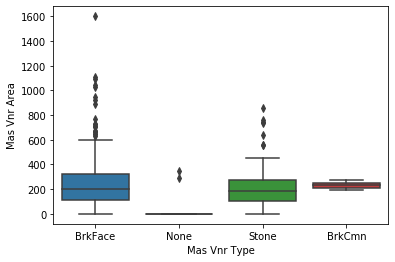

In [49]:
sns.boxplot(x='Mas Vnr Type', y='Mas Vnr Area',
            data=ames_train_clean[(ames_train_clean['Exterior 1st'] == 'VinylSd') & (ames_train_clean['Exterior 2nd']=='VinylSd')])

In [50]:
ames_train_clean[(ames_train_clean['Mas Vnr Type'] == 'None') &
                (ames_train_clean['Mas Vnr Area'] != 0)][[x for x in ames_train_clean.isnull() if 'Mas' in x]]
#observe that for idx 765, 1148, 1684 the Mas Vnr Area should likely just be 0, although we should investigate Mas Vnr Area = 1
#for 810 and 1832, we should fill in the missing values, but what's the proper proxy? MICE in R would have been able to fill in
#categorical. Implementation isn't in Python yet.

,Mas Vnr Type,Mas Vnr Area
765,None,1.0
810,None,288.0
1148,None,1.0
1684,None,1.0
1832,None,344.0


In [51]:
ames_train_clean[ames_train_clean['Mas Vnr Area']==1][[x for x in ames_train_clean if 'Mas' in x]]
# same entries, so change to 0

,Mas Vnr Type,Mas Vnr Area
765,None,1.0
1148,None,1.0
1684,None,1.0


In [52]:
ames_train_clean.loc[[765,1148,1684],'Mas Vnr Area'] = 0

In [53]:
ames_train_clean[(ames_train_clean['Mas Vnr Area'].isnull()) & (ames_train_clean['Mas Vnr Type'].isnull())].shape
#set all area to 0 and Type to None

(22, 81)

In [54]:
ames_train_clean.fillna({'Mas Vnr Area':0,'Mas Vnr Type':'None'},axis=0,inplace=True)

In [55]:
ames_train_clean.isnull().sum()[ames_train_clean.isnull().sum()>0]

Lot Frontage      330
Fireplace Qu     1000
Garage Type       113
Garage Yr Blt     114
Garage Finish     114
Garage Cars         1
Garage Area         1
Garage Qual       114
Garage Cond       114
Pool QC          2042
Fence            1651
Misc Feature     1986
dtype: int64

In [56]:
ames_train_clean['Fireplace Qu'].value_counts()

Gd    523
TA    407
Fa     59
Ex     31
Po     31
Name: Fireplace Qu, dtype: int64

In [57]:
ames_train_clean[ames_train_clean['Fireplace Qu'].isnull()][[x for x in ames_train_clean if 'Fireplace' in x]].mean()
# all the np.nan should be changed to 'NA'

Fireplaces      0.0
Fireplace Qu    NaN
dtype: float64

In [58]:
ames_train_clean.fillna({'Fireplace Qu':'NA'},axis=0,inplace=True)

In [59]:
ames_train_clean[ames_train_clean['Garage Type'].isnull()][[x for x in ames_train_clean if 'Garage' in x]].isnull().sum()

Garage Type      113
Garage Yr Blt    113
Garage Finish    113
Garage Cars        0
Garage Area        0
Garage Qual      113
Garage Cond      113
dtype: int64

In [60]:
ames_train_clean[ames_train_clean['Garage Type'].isnull()][[x for x in ames_train_clean if 'Garage' in x]].sum()
# fill Garage Yr Blt with mean and the rest with na, none, 0, etc since we can see that Garage Cars and Garage Area are both 0
# but we should investigate the row where type isn't np.nan but the rest are.

Garage Type      0.0
Garage Yr Blt    0.0
Garage Finish    0.0
Garage Cars      0.0
Garage Area      0.0
Garage Qual      0.0
Garage Cond      0.0
dtype: float64

In [61]:
ames_train_clean[ames_train_clean['Garage Cars'].isnull()][[x for x in ames_train_clean if 'Garage' in x]]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
ames_train_clean['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [63]:
ames_train_clean[ames_train_clean['Garage Type']=='Detchd'][[x for x in ames_train_clean if 'Garage' in x]].mode()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,Detchd,1920.0,Unf,2.0,576.0,TA,TA
1,NaN,1930.0,NaN,NaN,NaN,NaN,NaN


In [64]:
ames_train_clean.loc[1712,['Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond']] = \
[1920,'Unf','2','576','TA','TA']

In [65]:
ames_train_clean.fillna({'Garage Type':'NA','Garage Yr Blt':ames_train_clean['Garage Yr Blt'].mean(),
                        'Garage Finish':'NA','Garage Cars':0,'Garage Area':0,'Garage Qual':'NA',
                        'Garage Cond':'NA'},axis=0,inplace=True)

In [66]:
ames_train_clean.isnull().sum()[ames_train_clean.isnull().sum()>0]

Lot Frontage     330
Pool QC         2042
Fence           1651
Misc Feature    1986
dtype: int64

In [67]:
ames_train_clean[ames_train_clean['Pool Area'] != 0][['Pool Area','Pool QC']]

,Pool Area,Pool QC
52,519,Fa
657,576,Gd
761,800,Gd
952,228,Ex
960,480,Gd
1130,648,Fa
1249,738,Gd
1635,368,TA
1875,561,TA


In [68]:
ames_train_clean[ames_train_clean['Pool Area'] != 0][['Pool Area','Pool QC']].shape

(9, 2)

In [69]:
ames_train_clean['Pool QC'].value_counts()

Gd    4
TA    2
Fa    2
Ex    1
Name: Pool QC, dtype: int64

In [70]:
ames_train_clean.fillna({'Pool QC':'NA'},axis=0,inplace=True)

In [71]:
ames_train_clean[ames_train_clean['Misc Feature'].isnull()]['Misc Val'].sum()
# can set to 'NA' for 'Misc Feature'

0

In [72]:
ames_train_clean.fillna({'Misc Feature':'NA'},axis=0,inplace=True)

In [73]:
ames_train_clean.isnull().sum()[ames_train_clean.isnull().sum()>0]
#gonna try and use KNN imputation

Lot Frontage     330
Fence           1651
dtype: int64

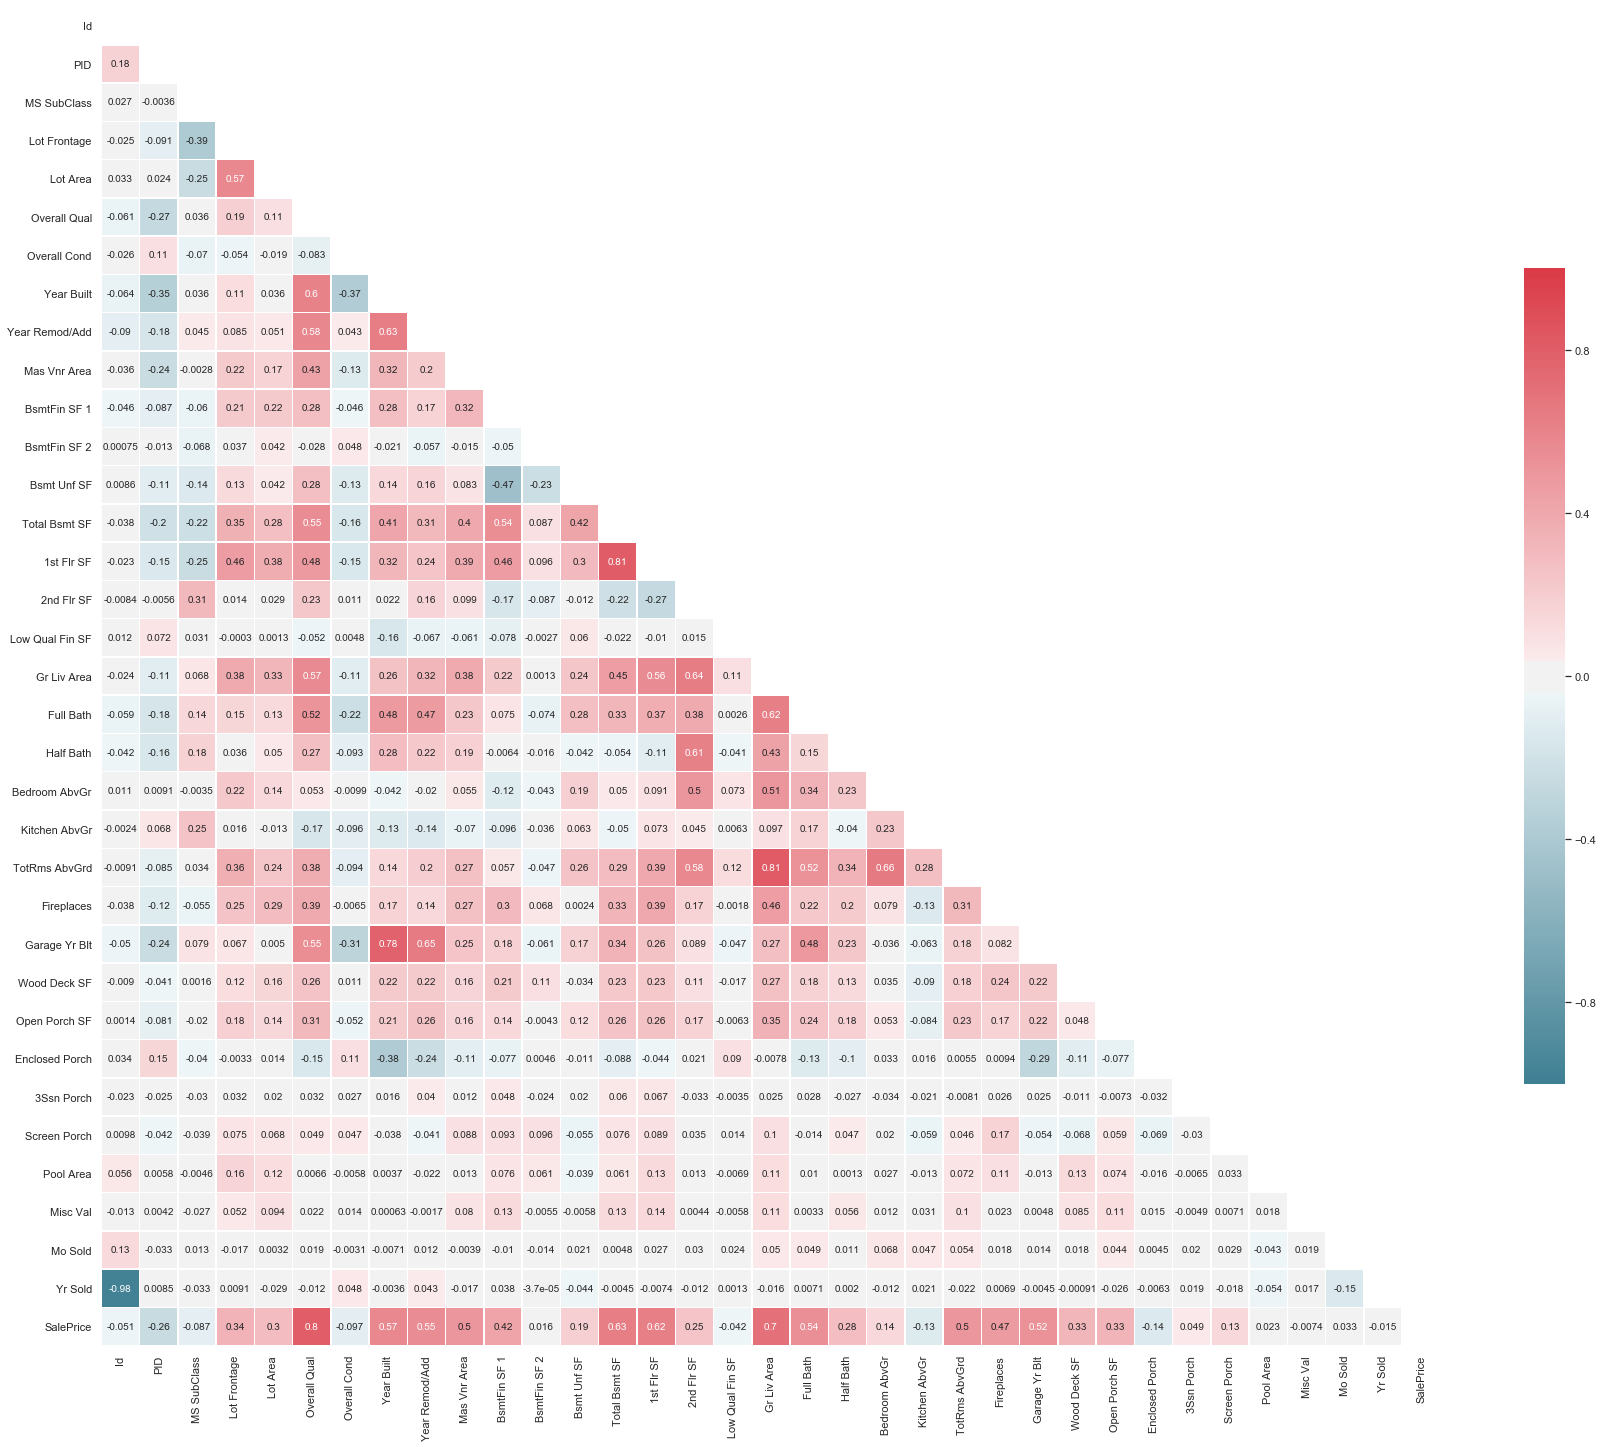

In [74]:
sns.set(style='white')
corr = ames_train_clean.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(30,30))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,vmin=-1,center=0,square=True,linewidths=.5,annot=True,annot_kws={'size':10},cbar_kws={'shrink':.5})

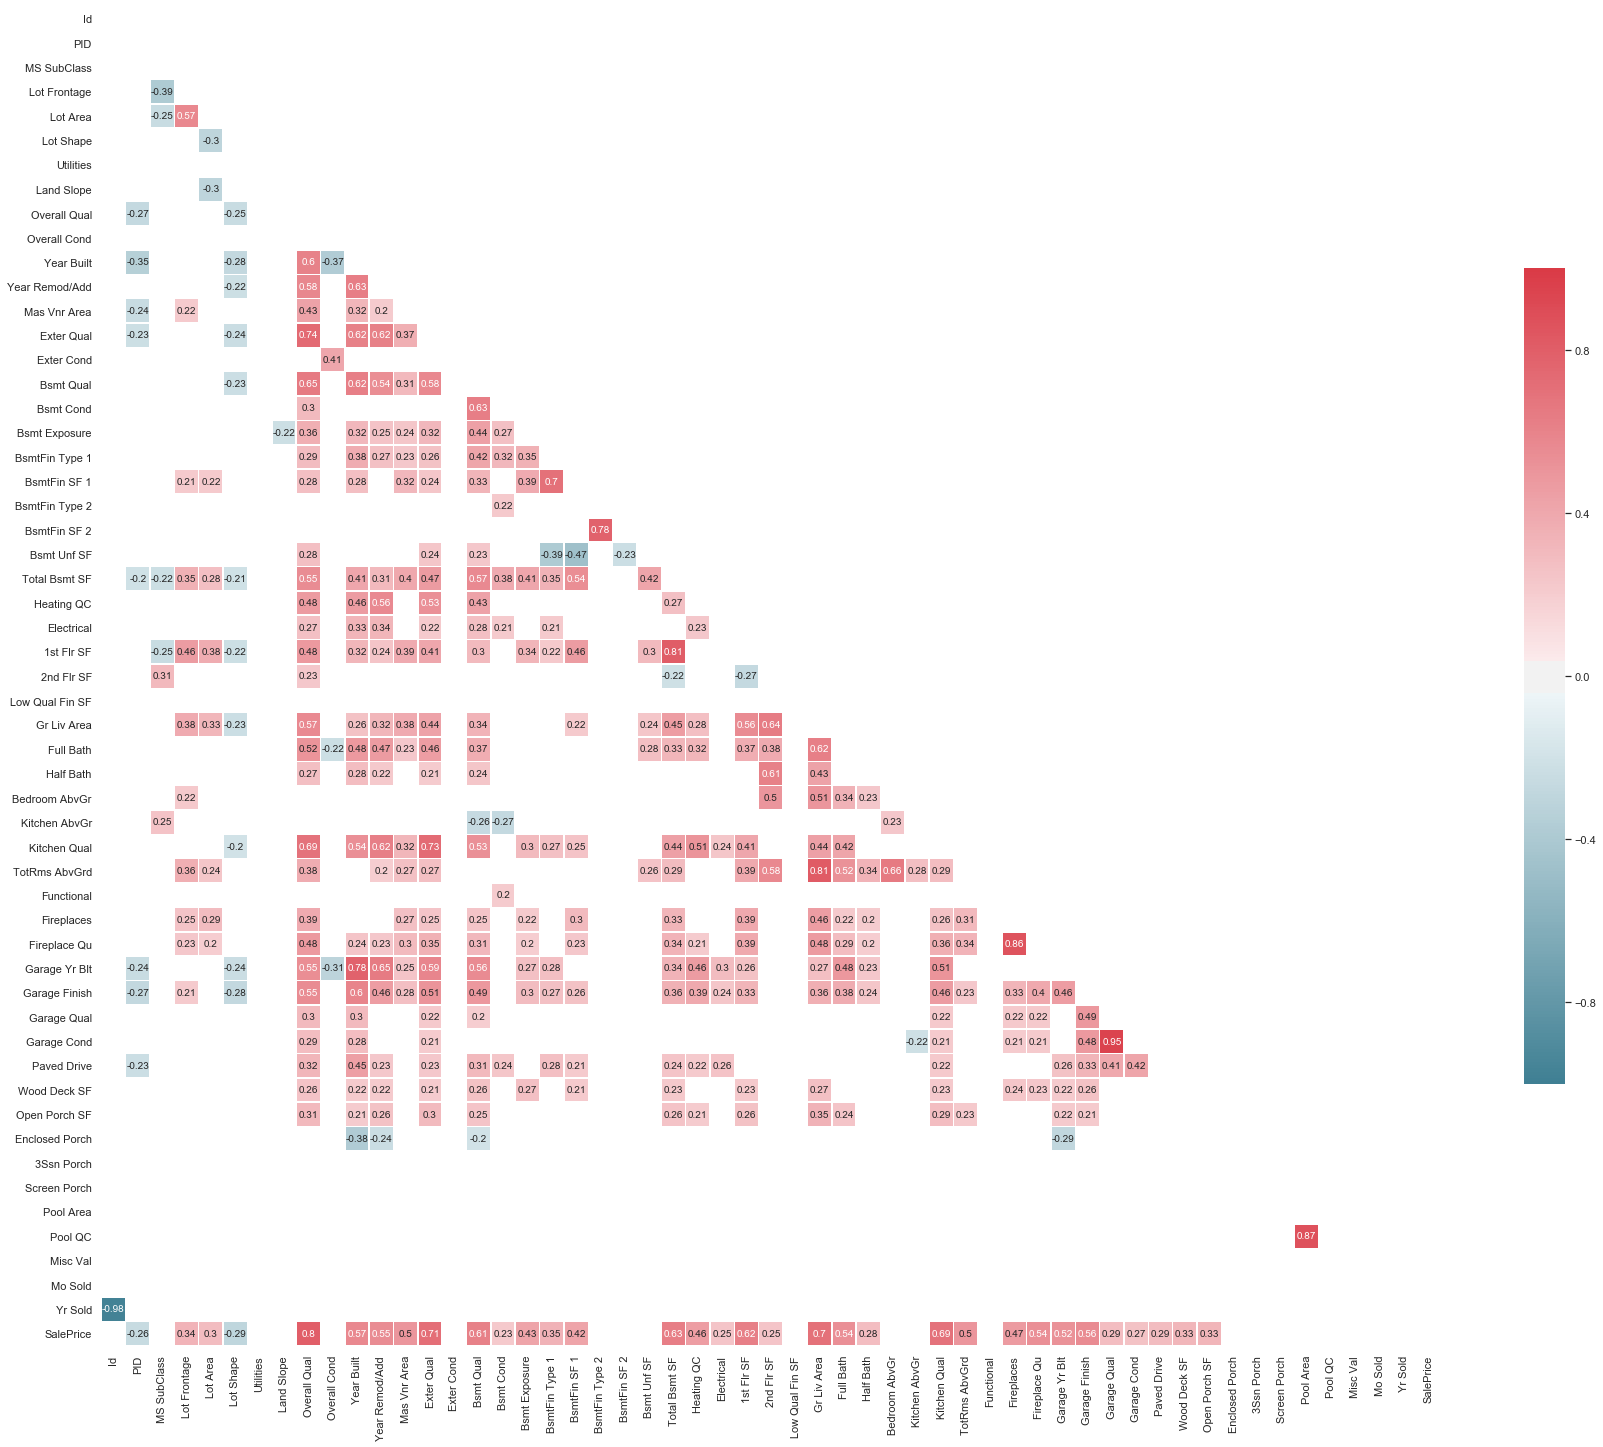

In [81]:
sns.set(style='white')
corr = ames_train_clean.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
abs_mask = mask | (np.abs(corr)<.2).values
f, ax = plt.subplots(figsize=(30,30))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=abs_mask,cmap=cmap,vmax=1,vmin=-1,center=0,square=True,linewidths=.5,annot=True,annot_kws={'size':10},cbar_kws={'shrink':.5})

In [79]:
ames_train_clean.dtypes[ames_train_clean.dtypes=='object']

MS Zoning         object
Street            object
Alley             object
Lot Shape         object
Land Contour      object
Utilities         object
Lot Config        object
Land Slope        object
Neighborhood      object
Condition 1       object
Condition 2       object
Bldg Type         object
House Style       object
Roof Style        object
Roof Matl         object
Exterior 1st      object
Exterior 2nd      object
Mas Vnr Type      object
Exter Qual        object
Exter Cond        object
Foundation        object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Heating           object
Heating QC        object
Central Air       object
Electrical        object
Bsmt Full Bath    object
Bsmt Half Bath    object
Kitchen Qual      object
Functional        object
Fireplace Qu      object
Garage Type       object
Garage Finish     object
Garage Cars       object
Garage Area       object
Garage Qual       object


In [80]:
#for k in ordinal_dict:
#    encoder = OrdinalEncoder(categories=[ordinal_dict[k]])
#    ames_train_clean[k] = encoder.fit_transform(ames_train_clean[[k]])

ValueError: Input contains NaN

Order is a bit off, ended up spending too much time on imputing, also started really late. But here's what I would have done (and will do): on first pass, change dtypes, .describe(), fix low-hanging fruits. Then quick and dirty viz to fix any other outliers. Then some discussion on missingness of data and relevant imputation techniques. I really wanted to try other techniques for imputation such as KNN and MICE. Then another round of EDA and then feature engineering.

In [82]:
ames_train_clean.to_csv('../datasets/train_clean.csv')